   age  sex  chest_pain_type  resting_blood_pressure  cholesterol  \
0   58    1                1                     134          246   
1   52    0                2                     112          245   
2   59    0                2                     126          196   
3   67    1                1                     165          201   
4   51    1                0                     146          174   

   fasting_blood_sugar  resting_ecg  max_heart_rate  exercise_induced_angina  \
0                    0            0             155                        0   
1                    0            0             143                        1   
2                    0            0             162                        1   
3                    0            0             180                        0   
4                    1            1             133                        1   

   st_depression  st_slope  num_major_vessels  thalassemia  heart_disease  
0            0.4         1  

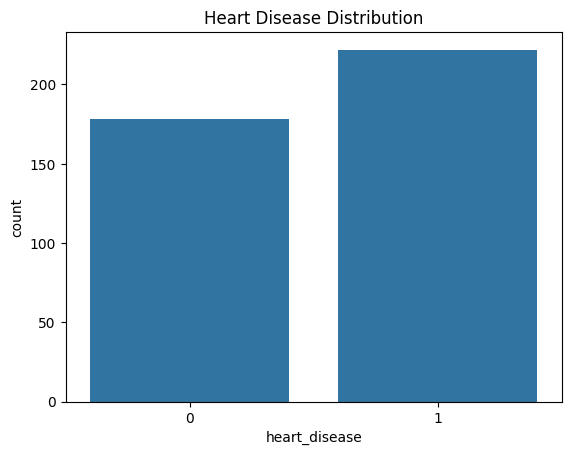


--- Decision Tree ---
Accuracy: 0.65
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.36      0.48        36
           1       0.63      0.89      0.74        44

    accuracy                           0.65        80
   macro avg       0.68      0.62      0.61        80
weighted avg       0.67      0.65      0.62        80



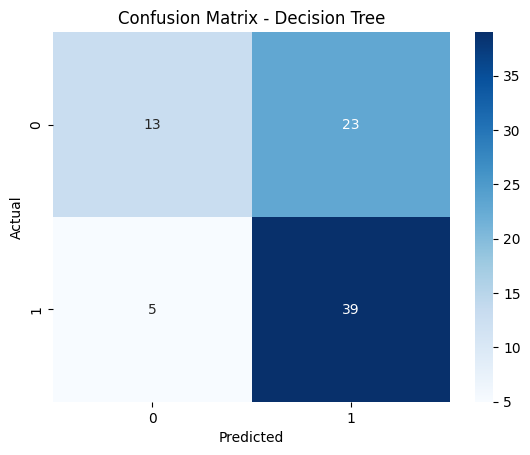


--- Random Forest ---
Accuracy: 0.6625
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.56      0.60        36
           1       0.67      0.75      0.71        44

    accuracy                           0.66        80
   macro avg       0.66      0.65      0.65        80
weighted avg       0.66      0.66      0.66        80



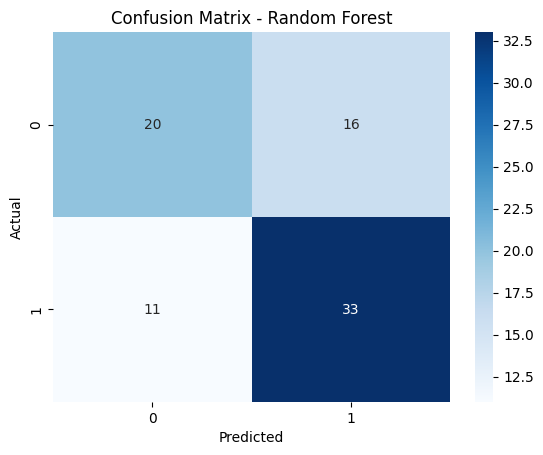

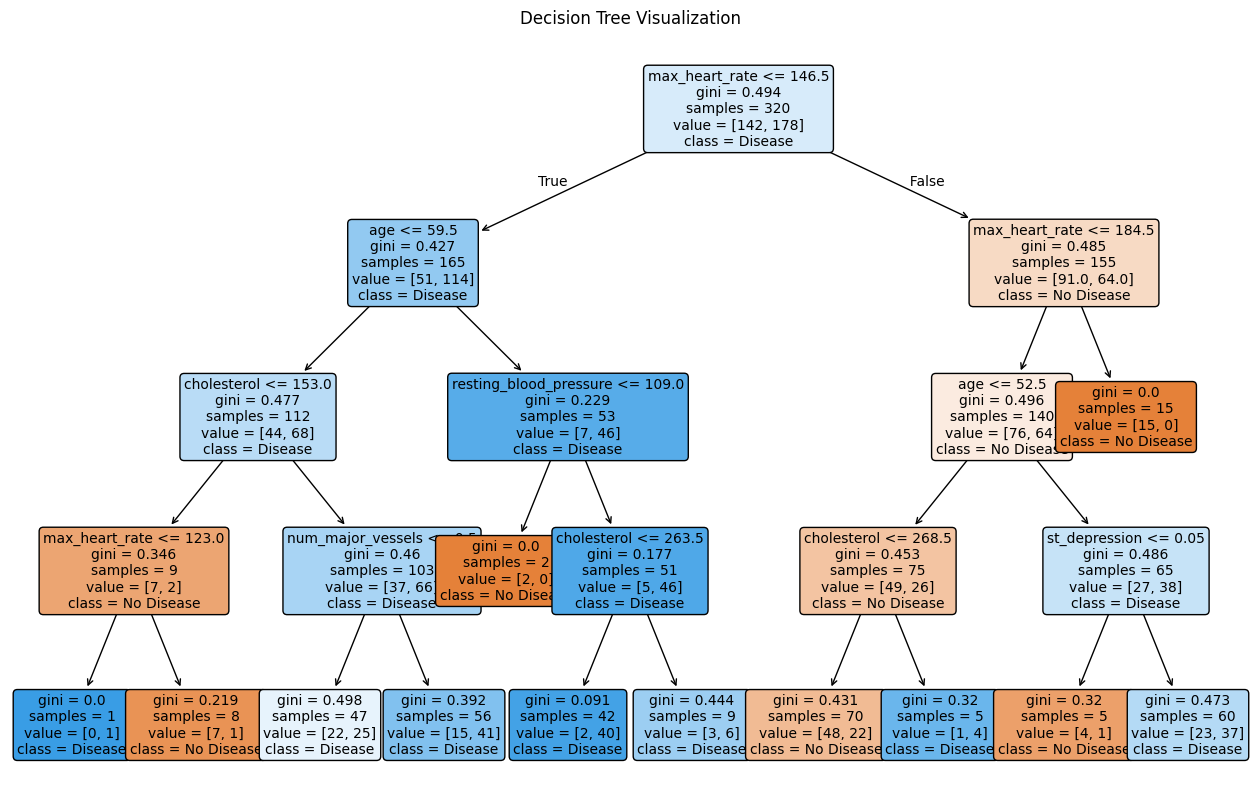

C:\Users\visha\AppData\Local\Temp\ipykernel_9400\2377339872.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=X.columns[indices], palette="viridis")


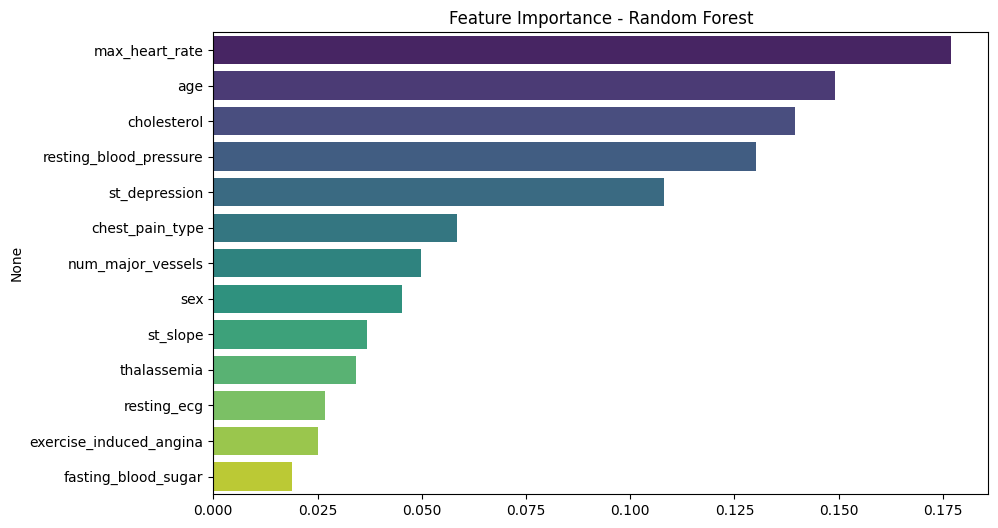

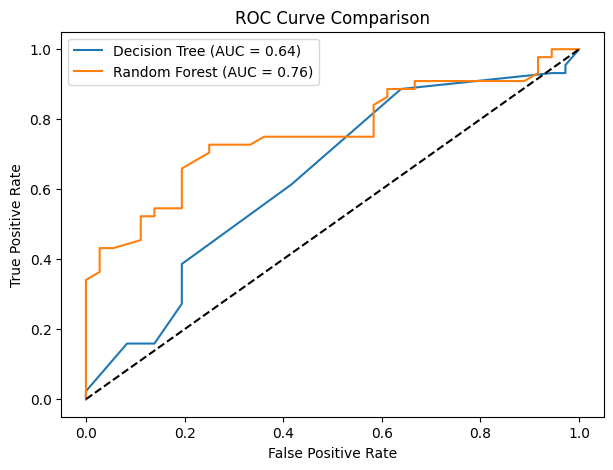

In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

# Step 2: Load Dataset
df = pd.read_csv("heart_disease_dataset.csv")  # <-- your dataset file

# Step 3: Quick EDA
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())
print("\nTarget Variable Distribution:\n", df['heart_disease'].value_counts())

# Visualize target distribution
sns.countplot(x='heart_disease', data=df)
plt.title("Heart Disease Distribution")
plt.show()

# Step 4: Split Data into Features & Target
X = df.drop("heart_disease", axis=1)
y = df["heart_disease"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 5: Model Building
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42, max_depth=4)  # limit depth for visualization
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Random Forest
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Step 6: Evaluation Function
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n--- {model_name} ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Evaluate models
evaluate_model(y_test, y_pred_dt, "Decision Tree")
evaluate_model(y_test, y_pred_rf, "Random Forest")

# Step 7: Plot Decision Tree
plt.figure(figsize=(16,10))
plot_tree(dt_model, feature_names=X.columns, class_names=["No Disease", "Disease"], 
          filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()

# Step 8: Feature Importance (Random Forest)
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices], y=X.columns[indices], palette="viridis")
plt.title("Feature Importance - Random Forest")
plt.show()

# Step 9: ROC Curve Comparison
y_prob_dt = dt_model.predict_proba(X_test)[:,1]
y_prob_rf = rf_model.predict_proba(X_test)[:,1]

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

plt.figure(figsize=(7,5))
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {auc(fpr_dt, tpr_dt):.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc(fpr_rf, tpr_rf):.2f})")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()